TextBlob - фундаментальний клас для NLP-операцій у модулі textblob.

In [1]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'

In [3]:
blob = TextBlob(text)

In [4]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

Використовуємо властивість sentence для отримання списку об'єктів Sentence

In [5]:
blob.sentences

[Sentence("Today is a beautiful day."),
 Sentence("Tomorrow looks like bad weather.")]

In [6]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Властивість words повертає об'єкт WordList зі списком об'єктів Word, що представляє кожне слово в TextBlob після видалення розділових знаків.

In [7]:
blob.words

WordList(['Today', 'is', 'a', 'beautiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather'])

Властивість tags повертає список кортежів, кожен із яких містить слово та рядок, що представляє його позначку частини мови: 

In [8]:
blob.tags

[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

Вилучення іменних конструкцій

Припустимо, ви збираєтеся кпити водні лижі та шукаєте інформацію про них в інтернеті - скажімо, по рядку "best water ski". У цьому випадку група "water ski" є іменною конструкцією.

Властивість noun_phrases класу TextBlob повертає об'єкт WordList зі списком об'єктів Word - по одному для кожної іменної конструкії у тексті:

Клас WordList є розширенням вбудованного типу списку Python. Об'єкти WordList надають додаткові методи для виділення основи, лематизації, утворення форми однини і множини.

In [10]:
nltk.download('brown')
blob.noun_phrases

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


WordList(['beautiful day', 'tomorrow', 'bad weather'])

Аналіх емоційного забарвлення з використанням аналізатора TextBlob за замовчуванням

Властивість sentiment класу TextBlob повертає об'єкт Sentiment, який повідомляє, має текст позитивне чи негативне емоційне забарвлення і чи є він об'єктивним чи суб'єктивним:

In [11]:
blob.sentiment

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

У навереденому висновку полярність (показник polarity) означає емоційне забарвлення зі значеннями від -1.0 (негативне) до 1.0 (позитивне); значення 0.0 відповідає нейтральному емоційному забарвленню. На основі даних TextBlob загальне емоційне забарвлення близьке до нейтрального, а текст загалом суб'єктивний.

In [12]:
%precision 3
blob.sentiment.polarity

0.075

In [13]:
%precision 3
blob.sentiment.subjectivity

0.833

Отримання емоційного забарвлення речення

Також можна отримати дані емоційного забарвлення на рівні окремих речень. Скористаємося властивістю sentence для отримання списку об'єктів Sequence1, а потім переберемо їх і виведемо властивість sentiment кожного об'єкту Sentence

In [14]:
for sentence in blob.sentences:
  print(sentence.sentiment)

Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


Це пояснює, чому емоційне забарвлення TextBlob близьке до 0.0 (нейтральне) - одне речення має позитивне забарвлення (0.85), а інше негативне (-0.7)

За замовчуванням об'єкт TextBlob та об'єкти Sentence та Word, що утворюються від нього, визначають емоційне забарвлення за допомогою об'єктів PatternAnalyzer, який використовує ті ж методи аналізу емоційного забарвлення, що і бібліотека Pattern.

Бібліотека TextBlob також містить об'єкт NativeBayesAnalyzer (модуль `textblob.sentiments`), який пройшов навчання на базі даних рецензій про фільми. Наївний баєсів класифікатор - алгоритм, що часто використовується для класифікації тексту із машинним навчанням. Наступний приклад використовує ключовий аргумент analyzer для признання аналізатора емоційного забарвлення TextBlob.

In [15]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [16]:
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())

In [17]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [18]:
blob.sentiment

Sentiment(classification='neg', p_pos=0.47662917962091056, p_neg=0.5233708203790892)

В даному випадку загальне емоційне забарвлення класифікується як негативне (`classification='neg'`). Властивість p_pos об'єкта Sentiment показує, що текст TextBlob позитивний на 47,66%, а властивість p_neg показує, що TextBlob негативний на 52,34%. Оскільки загальне емоційне забарвлення лише трохи негативне, емоційне забарвлення TextBlob може розглядатися як загалом нейтральне.

In [19]:
for sentence in blob.sentences:
  print(sentence.sentiment)

Sentiment(classification='pos', p_pos=0.8117563121751951, p_neg=0.18824368782480477)
Sentiment(classification='neg', p_pos=0.174363226578349, p_neg=0.8256367734216521)


І знову чи бачимо, що перше речення має позитивне, а друге - негативне емоційне забарвлення.

# Формоутворення: однина та множина

In [20]:
from textblob import Word

In [21]:
index = Word('index')
index.pluralize()

'indices'

In [24]:
cactus = Word('cactus')
cactus.pluralize()

'cactuss'

In [25]:
animals = TextBlob('dog cat fish bird').words
animals.pluralize()

WordList(['dogs', 'cats', 'fish', 'birds'])

Ви можете перевірити орфографію тексту в Word методом spellcheck цього об'єкту. Цей метод повертає список кортежів, які містять можливі варіанти написання слова та рівень достовірності. Припустимо, що ви хочете написати слово they, але випадково ввели його у вигляді theyr. Результати перевірки пропонують два можливі виправлення, при цьому варіант 'they' має найвищий рівень достовірності:

In [26]:
word = Word('theyr')
%precision 2
word.spellcheck()

[('they', 0.57), ('their', 0.43)]

In [27]:
word.correct()

'they'

In [28]:
sentence = TextBlob('Ths sentense has missplled wrds.')
sentence.correct()

TextBlob("The sentence has misspelled words.")

В результаті виділення основи зі слова видаляється префікс або суфікс і залишається лише основа, яка може бути реальним словом (але може і не бути). Лематизація виконується аналогічно, але її результатом є осмислена частина мови, тобто справжнє слово. Виділення основи та лематизація відносяться до операцій нормалізації, що готує слова для аналізу.

In [29]:
nltk.download('wordnet')
word = Word('varieties')
word.stem()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


'varieti'

In [30]:
word.lemmatize()

'variety'

In [48]:
import requests
blob = TextBlob(requests.get('https://github.com/gardenappl/uni/raw/main/semester7/nn/pg1513.txt').text)

In [49]:
blob.word_counts['juliet']

194

In [50]:
blob.word_counts['romeo']

319

Слова, що ігноруютьяс (стоп-слова) - слова, що часто зустрічаються в тексті, які часто видаляються з тексту перед аналізом, оскільки зазвичай не несуть корисної інформації.

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [43]:
blob = TextBlob('Today is a beautiful day.')

Додаємо кожне слово у отриманий список тільки в тому випадку, якщо слово не входить до `stops`

In [44]:
[word for word in blob.words if word not in stops]

['Today', 'beautiful', 'day']

Візуалізація частот входження слів засобами Pandas

In [51]:
blob = TextBlob(requests.get('https://github.com/gardenappl/uni/raw/main/semester7/nn/pg1513.txt').text)

Щоб побудувати візуалізацію 20 слів, необхідно знати всі слова та їх частоти. Викликаємо метод items словника blob.word_counts, щоб отримати список кортежів "слово-частота":

In [52]:
items = blob.word_counts.items()

Скористайтеся трансформацією списку для видалення кортежів, які містять стоп-слова:

In [53]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
items = [item for item in items if item[0] not in stops]

In [54]:
from operator import itemgetter

In [55]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

У процесі впорядкування елементів items функція sorted звертається до елемента з індексом 1 у кожному кортежі з використанням виразу `itemgetter(1)`. Ключовий аргумент `reverse=True` означає, що кортежі повинні сортуватися за спаданням.

Перетворення топ 20 у DataFrame

In [56]:
top20 = sorted_items[1:21]

In [57]:
import pandas as pd
df = pd.DataFrame(top20, columns=['word', 'count'])

In [58]:
df

,word,count
0,romeo,319
1,thou,278
2,juliet,194
3,thy,170
4,capulet,163
5,nurse,149
6,love,148
7,thee,138
8,lady,117
9,shall,112


Щоб побудувати візуалізацію даних, використовуємо метод bar властивості plot колекції DataFrame. Аргументи вказують, які дані стовпця мають вивдоитися по осях x і y, і що на діаграмі не повинні виводитися умовні позначення.

Метод bar створює та виводить гістограму Matplotlib

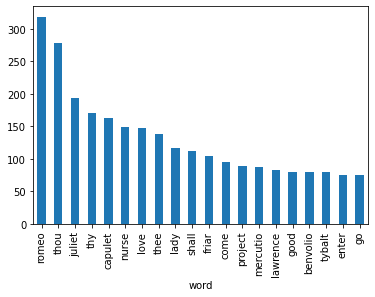

In [59]:
axes = df.plot.bar(x='word', y='count', legend=False)

In [62]:
text = requests.get('https://github.com/gardenappl/uni/raw/main/semester7/nn/pg1513.txt').text

In [63]:
import imageio
mask_image = imageio.imread('https://github.com/gardenappl/uni/raw/main/semester7/nn/heart-mask.jpg')

In [67]:
from wordcloud import WordCloud
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')

In [73]:
wordcloud.generate(text).to_file('romeo-and-juliet-heart.png')

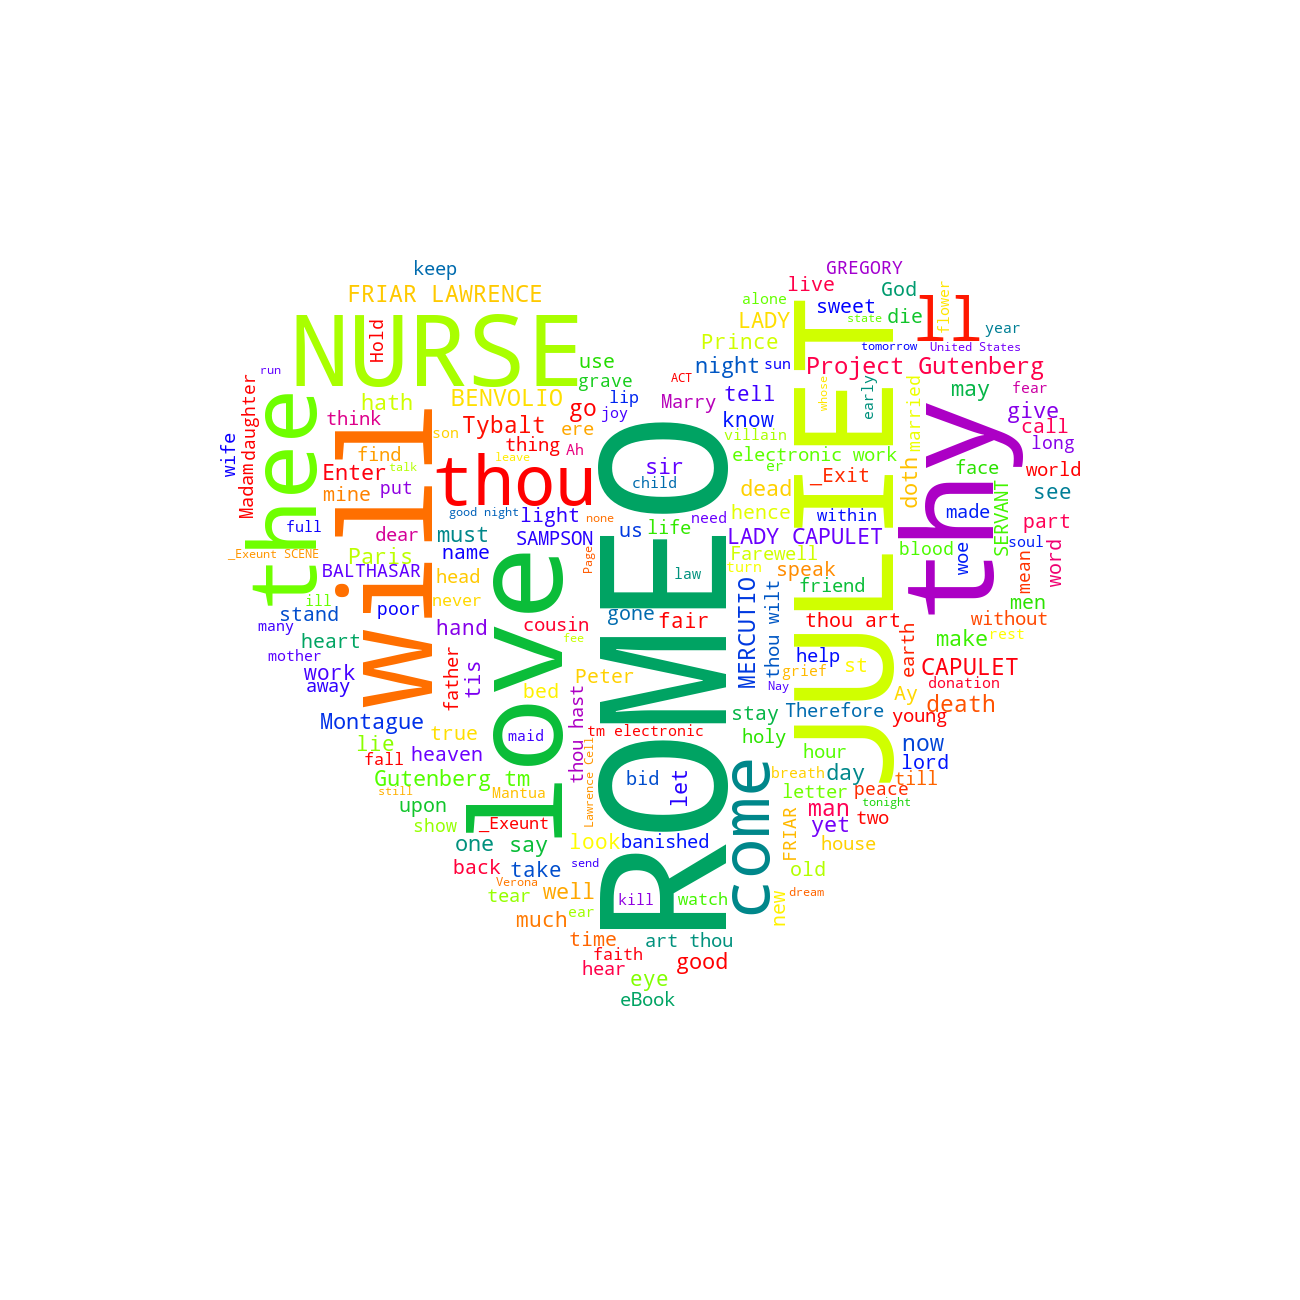

In [74]:
from IPython.display import Image
Image('romeo-and-juliet-heart.png')